<a href="https://colab.research.google.com/github/susandong/w266_final_project_game_sentiment/blob/master/w266_Final_Project_Aspect_Extraction_1129.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project: Game Review Sentiment Analysis Aspect Extraction
Hypothesis 2:   

* 2a)Can we use unsupervised aspect extraction to extract aspect and related sentiment in game review?   

* 2b)what are the differences between fps game and communication games in terms of aspect?

## Dataset: 
* Game Review:   

  1. fps games: csgo game review
  2. communication games: fg game review

## Algorithm: 
* unsupervised aspect extraction with attention (CAT paper) 
* Sentiment analysis with 


In [ ]:
#Load libraries
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install unidecode
!pip install vaderSentiment
import unidecode
import re
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
from nltk.tokenize import RegexpTokenizer

In [ ]:
""" Download Data: There are 4 games with review data
Fall Guys (fg)
PlayerUnknown Battlegrounds (pubg)
Dota 2 (dota2)
Counterstrike Source: Go (csgo)

Review data has the following columns:
app: ID for the game
useful: how many users voted the review as useful
funny: how many users voted the review as funny
username: username of the person who wrote the review
games_owned: how many games the reviewer owns on Steam
num_reviews: how many reviews the reviewer has written on Steam
recommend: 1 for recommend (thumbs up), -1 for do not recommend (thumbs down)
hours_played: number of hours the reviewer played before writing the review
date: date review was written
text: text of the review
"""
#Fall Guys
fg_url = 'https://raw.githubusercontent.com/susandong/w266_final_project_game_sentiment/master/data/fallguys_reviews.csv'
fg_df = pd.read_csv(fg_url, error_bad_lines=False)
fg_df = fg_df.dropna()

#CS: Go
csgo_url = 'https://raw.githubusercontent.com/susandong/w266_final_project_game_sentiment/master/data/csgo_reviews.csv'
csgo_df = pd.read_csv(csgo_url, error_bad_lines=False)
csgo_df = csgo_df.dropna()

#PUBG
pubg_url = 'https://raw.githubusercontent.com/susandong/w266_final_project_game_sentiment/master/data/pubg_reviews.csv'
pubg_df = pd.read_csv(pubg_url, error_bad_lines=False)
pubg_df = pubg_df.dropna()

#dota2_url = 'https://raw.githubusercontent.com/susandong/w266_final_project_game_sentiment/master/data/dota2_reviews.csv'
#dota2_df = pd.read_csv(dota2_url, error_bad_lines=False)
#player_url = 'https://raw.githubusercontent.com/susandong/w266_final_project_game_sentiment/master/data/PlayerCountData.csv'
#player_df = pd.read_csv(player_url, error_bad_lines=False)

In [ ]:

def remove_blankrow(df,column):
  tokenizer = RegexpTokenizer(r'\w+')
  df['lens'] =[len(tokenizer.tokenize(utterance)) for utterance in df[column]]
  df_clean=df[df['lens'] !=0]
  return df_clean

In [ ]:
# Data Preprocessing

#from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')

tknzr = TweetTokenizer()
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
#lemma = WordNetLemmatizer()

#Convert accented characters
def remove_accents(text):
  try:
    text = unidecode.unidecode(text)
  except:
    pass
  return text

#Remove digits and punctuation
def remove_nonletters(text):
  try:
    #Remove digits AND punctuation
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    #Remove just digits that are by themselves
    #text = re.sub('^\d+\s|\s\d+\s|\s\d+$', ' ', text)
  except:
    pass
  return text


#Use Tweet Tokenizer for some built-in emoji support
def tweet_tokenization(text):
  try:
    return tknzr.tokenize(text)
  except:
    pass

def remove_stopwords(token):
  try:
    return [item for item in token if item not in stop_words]
  except:
    pass

def remove_stemmer(token):
  try:
    return [stemmer.stem(i) for i in token]
  except:
    pass

def remove_lemmatizer(token):
  try:
    return [lemma.lemmatize(word=w, pow='v') for w in token]
  except:
    pass
  
def remove_shortwords(token):
  try:
    return [i for i in token if len(i) > 1]
  except:
    pass

def token_to_string(listTokens):
  return ' '.join(listTokens)

#Process text from dataframe. df = dataframe to clean, text = name of column with text
def process_text(df, text):

  #Create new column for cleaned text
  df['cleaned'] = df[text]

  #Lower case all text
  df['cleaned'] = df['cleaned'].str.lower()

  #Clean URLs
  df['cleaned'] = df['cleaned'].str.replace('http\S+|www.\S+', '', case=False)

  #Remove accents from text
  #df['cleaned'] = df['cleaned'].apply(remove_accents)

  #Remove numbers and punctuation from text
  df['cleaned'] = df['cleaned'].apply(remove_nonletters)
  
  #Tokenize
  df['cleaned'] = df['cleaned'].apply(tweet_tokenization)

  #Remove stopwords
  #df['cleaned'] = df['cleaned'].apply(remove_stopwords)
  
  #Remove short words
  df['cleaned'] = df['cleaned'].apply(remove_shortwords)

  #Stemming - can decide to use or not
  #df['cleaned'] = df['cleaned'].apply(remove_stemmer)

  #Convert tokens back to string
  df['cleaned'] = df['cleaned'].apply(token_to_string)

  #Remove blankrows
  df = remove_blankrow(df, 'cleaned')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#preprocess all the datasets for all 3 games
process_text(fg_df, 'text')
#len(fg_df['cleaned'][11]) < 2
process_text(csgo_df, 'text')
process_text(pubg_df, 'text')

In [ ]:
fg_df.shape


(90410, 12)

In [ ]:
#remove blank rows
fg_df_text=remove_blankrow(fg_df,'cleaned')["cleaned"]

csgo_df_text=remove_blankrow(csgo_df,'cleaned')["cleaned"]
pubg_df_text=remove_blankrow(pubg_df,'cleaned')["cleaned"]
pubg_df_text.shape


(226783,)

In [ ]:
fg_df_text.to_csv("fg_review_text_final_v2",header=False)

In [ ]:
csgo_df_text.to_csv("csgo_review_text_final_v2",header=False)

In [ ]:
csgo_df_text.shape

(118567,)

In [ ]:
## Aspect extraction with word2vec embedding in gensim

In [ ]:


%matplotlib inline

import nltk.data;

from gensim.models import word2vec;

from sklearn.cluster import KMeans;
from sklearn.neighbors import KDTree;

import pandas as pd;
import numpy as np;

import os;
import re;
import logging;
import sqlite3;
import time;
import sys;
import multiprocessing;
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt;
from itertools import cycle;



In [ ]:

nltk.download('punkt')
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle');

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#tokenize text
fg_df_text_tokenized=fg_df_text.apply(tweet_tokenization)

In [ ]:
start = time.time();

#Set the logging format to get some basic updates.
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)

# Set values for various parameters
num_features = 100;    # Dimensionality of the hidden layer representation
min_word_count = 4;   # Minimum word count to keep a word in the vocabulary
num_workers = multiprocessing.cpu_count();       # Number of threads to run in parallel set to total number of cpus.
context = 5          # Context window size (on each side)                                                       
downsampling = 1e-3   # Downsample setting for frequent words

# Initialize and train the model. 
#The LineSentence object allows us to pass in a file name directly as input to Word2Vec,
#instead of having to read it into memory first.

print("Training model...");
model = word2vec.Word2Vec(fg_df_text_tokenized, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling);

# We don't plan on training the model any further, so calling 
# init_sims will make the model more memory efficient by normalizing the vectors in-place.
model.init_sims(replace=True);

# Save the model
model_name = "model_full_game";
model.save(model_name);

#print('Total time: ' + str((time.time() - start)) + ' secs')

2020-11-30 05:13:16,907 : INFO : collecting all words and their counts
2020-11-30 05:13:16,908 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-11-30 05:13:16,961 : INFO : PROGRESS: at sentence #10000, processed 189986 words, keeping 10008 word types
2020-11-30 05:13:17,008 : INFO : PROGRESS: at sentence #20000, processed 352595 words, keeping 14872 word types
2020-11-30 05:13:17,044 : INFO : PROGRESS: at sentence #30000, processed 501734 words, keeping 18210 word types
2020-11-30 05:13:17,085 : INFO : PROGRESS: at sentence #40000, processed 664869 words, keeping 21477 word types


Training model...


2020-11-30 05:13:17,131 : INFO : PROGRESS: at sentence #50000, processed 850834 words, keeping 24443 word types
2020-11-30 05:13:17,180 : INFO : PROGRESS: at sentence #60000, processed 1059558 words, keeping 27216 word types
2020-11-30 05:13:17,242 : INFO : PROGRESS: at sentence #70000, processed 1344663 words, keeping 30210 word types
2020-11-30 05:13:17,300 : INFO : PROGRESS: at sentence #80000, processed 1603160 words, keeping 33061 word types
2020-11-30 05:13:17,334 : INFO : collected 34952 word types from a corpus of 1748803 raw words and 87847 sentences
2020-11-30 05:13:17,335 : INFO : Loading a fresh vocabulary
2020-11-30 05:13:17,366 : INFO : effective_min_count=4 retains 8887 unique words (25% of original 34952, drops 26065)
2020-11-30 05:13:17,367 : INFO : effective_min_count=4 leaves 1715203 word corpus (98% of original 1748803, drops 33600)
2020-11-30 05:13:17,397 : INFO : deleting the raw counts dictionary of 34952 items
2020-11-30 05:13:17,400 : INFO : sample=0.001 downsa

Total time: 12.224370956420898 secs


In [ ]:
model = word2vec.Word2Vec.load('model_full_game')

2020-11-30 05:13:29,142 : INFO : loading Word2Vec object from model_full_game
2020-11-30 05:13:29,222 : INFO : loading wv recursively from model_full_game.wv.* with mmap=None
2020-11-30 05:13:29,222 : INFO : setting ignored attribute vectors_norm to None
2020-11-30 05:13:29,223 : INFO : loading vocabulary recursively from model_full_game.vocabulary.* with mmap=None
2020-11-30 05:13:29,224 : INFO : loading trainables recursively from model_full_game.trainables.* with mmap=None
2020-11-30 05:13:29,225 : INFO : setting ignored attribute cum_table to None
2020-11-30 05:13:29,226 : INFO : loaded model_full_game


In [ ]:
model.wv['design']

array([ 0.1327    , -0.01282406,  0.02822841, -0.11354175, -0.05139009,
        0.09539826,  0.09953274,  0.09168584,  0.04874735, -0.04435923,
       -0.14234984,  0.01858038,  0.00656976, -0.14651494, -0.05536489,
       -0.03610853, -0.11378744,  0.01017868,  0.09220725,  0.05613735,
       -0.01529327,  0.08263876, -0.09886692,  0.08675379, -0.12973009,
        0.20853819,  0.12480985,  0.06805932, -0.07432627, -0.06253787,
       -0.02459421,  0.28950256,  0.08148087, -0.0560331 , -0.10949425,
       -0.11218738,  0.02882916,  0.00849777,  0.10028146, -0.08890696,
        0.15848358,  0.18643948, -0.05703058, -0.15258096,  0.03032086,
       -0.00850626,  0.02647657,  0.07227655, -0.14148088, -0.06305078,
        0.03692735,  0.00463161,  0.04554168,  0.01820813, -0.05252282,
        0.07510676,  0.01435483, -0.00117465, -0.09000956, -0.09277203,
       -0.00989039,  0.00766436,  0.15036707, -0.00436268,  0.00641968,
        0.17179404,  0.005624  , -0.0190917 , -0.05017204,  0.01

In [ ]:
Z = model.wv.syn0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.


In [ ]:
#100 vector per word
print(Z[0].shape)
Z[0]

(100,)


array([ 0.1587925 , -0.08928841,  0.07397182, -0.10469238, -0.03719344,
        0.25014806,  0.00400675, -0.17462872,  0.10006379, -0.1355905 ,
       -0.01082472, -0.13697398,  0.05958966,  0.22142543,  0.13801043,
        0.01710247, -0.07038821,  0.12120213,  0.01350596, -0.07235699,
       -0.02074218,  0.05034162,  0.07545972, -0.17847237, -0.10835167,
        0.06873611, -0.01052263,  0.1758024 ,  0.03490781, -0.09966074,
       -0.03194235,  0.11438927,  0.03381001,  0.12718983,  0.04915005,
       -0.07970897, -0.09663429,  0.06403992,  0.14442733,  0.04300756,
        0.05983939, -0.08463358, -0.03821822, -0.06428319,  0.02211371,
        0.04876302,  0.05940839, -0.06243271, -0.05594997, -0.00414608,
        0.18187967,  0.10648019, -0.19029781, -0.05878729,  0.00934547,
       -0.1519444 ,  0.1652107 ,  0.0526341 ,  0.02379435, -0.04136626,
        0.15220037, -0.01447473, -0.08525392, -0.06831571, -0.06280885,
       -0.15518138, -0.01860712, -0.09128616,  0.07966905, -0.14

In [ ]:


def clustering_on_wordvecs(word_vectors, num_clusters):
    # Initalize a k-means object and use it to extract centroids
    kmeans_clustering = KMeans(n_clusters = num_clusters, init='k-means++');
    idx = kmeans_clustering.fit_predict(word_vectors);
    
    return kmeans_clustering.cluster_centers_, idx;



In [ ]:
start = time.time();
centers, clusters = clustering_on_wordvecs(Z, 6);
#print('Total time: ' + str((time.time() - start)) + ' secs')

In [ ]:
start = time.time();
centroid_map = dict(zip(model.wv.index2word, clusters));
#print('Total time: ' + str((time.time() - start)) + ' secs')

In [ ]:


def get_top_words(index2word, k, centers, wordvecs):
    tree = KDTree(wordvecs);

    #Closest points for each Cluster center is used to query the closest 20 points to it.
    closest_points = [tree.query(np.reshape(x, (1, -1)), k=k) for x in centers];
    closest_words_idxs = [x[1] for x in closest_points];

    #Word Index is queried for each position in the above array, and added to a Dictionary.
    closest_words = {};
    for i in range(0, len(closest_words_idxs)):
        closest_words['Cluster #' + str(i+1).zfill(2)] = [index2word[j] for j in closest_words_idxs[i][0]]

    #A DataFrame is generated from the dictionary.
    df = pd.DataFrame(closest_words);
    df.index = df.index+1

    return df



In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
top_words = get_top_words(model.wv.index2word, 20, centers, Z)

In [ ]:
#top words per cluster
top_words

,Cluster #01,Cluster #02,Cluster #03,Cluster #04,Cluster #05,Cluster #06
1,latinoamerica,igra,considerably,whimsical,checkpoint,hexagonal
2,fofo,mantap,estan,aesthetically,miracle,tower
3,spa,szar,har,wonderfully,booted,spawning
4,gli,fune,divertente,cheerful,reinstall,goop
5,een,sranje,spec,brightly,qualifications,respawn
6,precio,kurva,banners,vivid,reported,beam
7,interessante,goodd,public,gorgeous,attempts,pole
8,stunden,koi,dll,cartoonish,passed,sliding
9,foda,anjing,pata,fantastically,speedhacks,hoop
10,ti,merda,leaderboard,visually,shortly,spawns


In [ ]:
def get_word_table(table, key, sim_key='similarity', show_sim = True):
    if show_sim == True:
        return pd.DataFrame(table, columns=[key, sim_key])
    else:
        return pd.DataFrame(table, columns=[key, sim_key])[key]




In [ ]:
keys = ['game', 'design', 'tactic','feeling','community' ]
#keys = ['design', 'tactic', 'money', 'time','community']
tables = []
for key in keys:
    tables.append(get_word_table(model.wv.similar_by_word(key,topn=50), key, show_sim=False))
    

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
#aspect extraction and aspect terms
aspect_terms = pd.concat(tables, axis=1)

In [ ]:
aspect_terms

,game,design,tactic,feeling,community
0,experience,artstyle,inability,satisfaction,mediatonic
1,match,music,notable,crown,developer
2,it,sound,dreaded,winning,company
3,games,art,activate,secs,support
4,round,aesthetics,refuses,rush,user
5,day,effects,thr,chance,developers
6,point,vibrant,scores,accomplishment,continuing
7,thing,catchy,rendering,victory,feedback
8,honestly,visuals,har,gist,active
9,fun,execution,vile,feels,expand


In [ ]:
## aspect extract and classification 



In [ ]:
#df_cs=pd.read_csv("/content/all_txt_csgo.txt",header=None)

FileNotFoundError: ignored

In [ ]:
#df_pred_cs=pd.read_csv("/content/pred_result_csgo_final.txt",header=None,sep='\n')

In [ ]:
#Aspect extraction of Game Reviews
##CAT: https://github.com/clips/cat

#works, results to be uploaded to repo, but the results are not reliable



In [ ]:
# calculate sentiment score for each review

In [ ]:
def sentiment_analyzer(data):
  analyser = SentimentIntensityAnalyzer()

  sentiment_score_list = []
  sentiment_label_list = []

  for i in data.values.tolist():
    #if type(i) == "float":
      #print(i)
      #continue
      sentiment_score = analyser.polarity_scores(i)

      if sentiment_score['compound'] >= 0.05:
          sentiment_score_list.append(sentiment_score['compound'])
          sentiment_label_list.append('Positive')
      elif sentiment_score['compound'] > -0.05 and sentiment_score['compound'] < 0.05:
          sentiment_score_list.append(sentiment_score['compound'])
          sentiment_label_list.append('Neutral')
      elif sentiment_score['compound'] <= -0.05:
          sentiment_score_list.append(sentiment_score['compound'])
          sentiment_label_list.append('Negative')
  data=pd.DataFrame(data)
  data['sentiment'] = sentiment_label_list
  data['sentiment score'] = sentiment_score_list

  return data


In [ ]:
#use cat output to label each review with one aspect, 
#merge with sentiment score to see the difference between genre/games
def merge_plot_aspect_sentiment(df_sentiment,df_aspect):
  df_merged=pd.concat((df_sentiment,df_aspect),axis=1)
  df_merged.columns=['text','sentiment', 'sentiment score','aspect']
  return df_merged

In [ ]:
fg_df_sentiment=sentiment_analyzer(fg_df_text)

KeyboardInterrupt: ignored

In [ ]:
csgo_df_sentiment=sentiment_analyzer(csgo_df_text)

In [ ]:
csgo_df_sentiment.head()

,cleaned,sentiment,sentiment score
0,nice,Positive,0.4215
1,ok game,Positive,0.2960
2,eish,Neutral,0.0000
3,cyka blyat rush don stop good for learning rus...,Positive,0.1779
4,gud game learn russian really quick very nice ...,Positive,0.7036


In [ ]:
df_pred_fg=pd.read_csv("/content/pred_result_fg_final_v2.txt",header=None,sep='\n')

In [ ]:
df_pred_csgo=pd.read_csv("/content/pred_result_csgo_final_v2.txt",header=None,sep='\n')

In [ ]:
#{'tactic', 'game', 'community', 'design', 'feeling'}
#  0          1         2           3        4
df_merged_fg=merge_plot_aspect_sentiment(fg_df_sentiment,df_pred_fg)

In [ ]:
#{'design', 'community', 'feeling', 'game', 'tactic'}
#  0            1           2          3        4
df_merged_csgo=merge_plot_aspect_sentiment(csgo_df_sentiment,df_pred_csgo)

In [ ]:
def label_plot_aspect(data,map_dict):
  data_clean=data.dropna()
  map_dict = map_dict 
  data_clean["aspect_label"] = data_clean["aspect"].map(map_dict)
  ax = sns.countplot(x="aspect_label",hue ="sentiment",data=data_clean, palette="husl",hue_order=['Positive','Neutral','Negative'], order=['game','tactic','design','feeling','community'])
  ax.set_title('Sentiment of Aspects')

  data_group_aspect=data_clean.groupby(['aspect_label'])['sentiment'].value_counts()
  
  data_group_aspect_new = pd.DataFrame(data_group_aspect.reset_index(name='count'))
  data_group_aspect_new['percent'] = data_group_aspect_new['count']/sum(data_group_aspect_new['count'])
  print(data_group_aspect_new)
  return data_clean

FG: Game Review aspect based sentiment analysis


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


   aspect_label sentiment  count   percent
0     community  Positive   3035  0.035649
1     community   Neutral    767  0.009009
2     community  Negative    649  0.007623
3        design  Positive  14712  0.172808
4        design   Neutral   3909  0.045915
5        design  Negative   2986  0.035074
6       feeling  Positive   8206  0.096388
7       feeling   Neutral   2226  0.026147
8       feeling  Negative   1765  0.020732
9          game  Positive  16356  0.192118
10         game   Neutral   4550  0.053445
11         game  Negative   3455  0.040583
12       tactic  Positive  15280  0.179480
13       tactic   Neutral   4013  0.047137
14       tactic  Negative   3226  0.037893


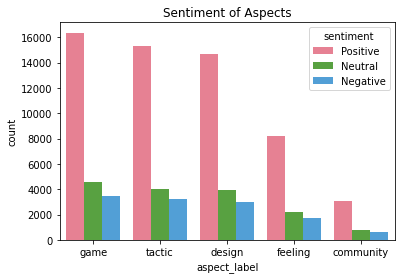

In [ ]:
print("FG: Game Review aspect based sentiment analysis")
data_fg_clean=label_plot_aspect(df_merged_fg,{0:'tactic', 1:'game', 2:'community', 3:'design', 4:'feeling'})
#ax = sns.countplot(x="aspect_label",hue = "sentiment",data=data_fg_clean, palette=["C1", "C0", "k"],hue_order=['Positive','Neutral','Negative'])


CSGO: Game Review aspect based sentiment analysis


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


   aspect_label sentiment  count   percent
0     community  Positive   1182  0.010611
1     community   Neutral    502  0.004506
2     community  Negative    262  0.002352
3        design  Positive  28578  0.256540
4        design   Neutral  11987  0.107605
5        design  Negative   6540  0.058708
6       feeling  Positive   3909  0.035090
7       feeling   Neutral   1636  0.014686
8       feeling  Negative    904  0.008115
9          game  Positive  16460  0.147758
10         game   Neutral   7096  0.063700
11         game  Negative   3881  0.034839
12       tactic  Positive  17230  0.154671
13       tactic   Neutral   7262  0.065190
14       tactic  Negative   3969  0.035629


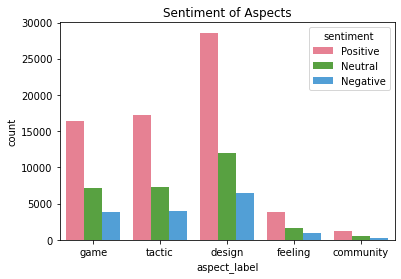

In [ ]:
print("CSGO: Game Review aspect based sentiment analysis")
data_csgo_clean=label_plot_aspect(df_merged_csgo,{4:'tactic', 3:'game', 1:'community', 0:'design', 2:'feeling'})
